In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [5]:
dataset=pd.read_csv('Placement_Data_Full_Class.csv')
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
dataset['status']=dataset['status'].map({'Placed':1, 'Not Placed':0})

In [8]:
dataset.salary.fillna(0, inplace=True)

In [9]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0


In [10]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

<AxesSubplot:xlabel='status', ylabel='count'>

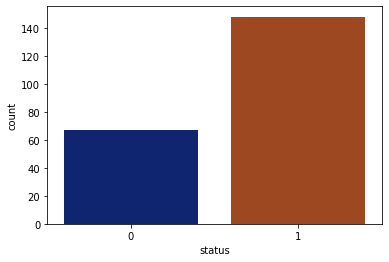

In [12]:
sns.countplot(x='status', palette='dark', data=dataset)

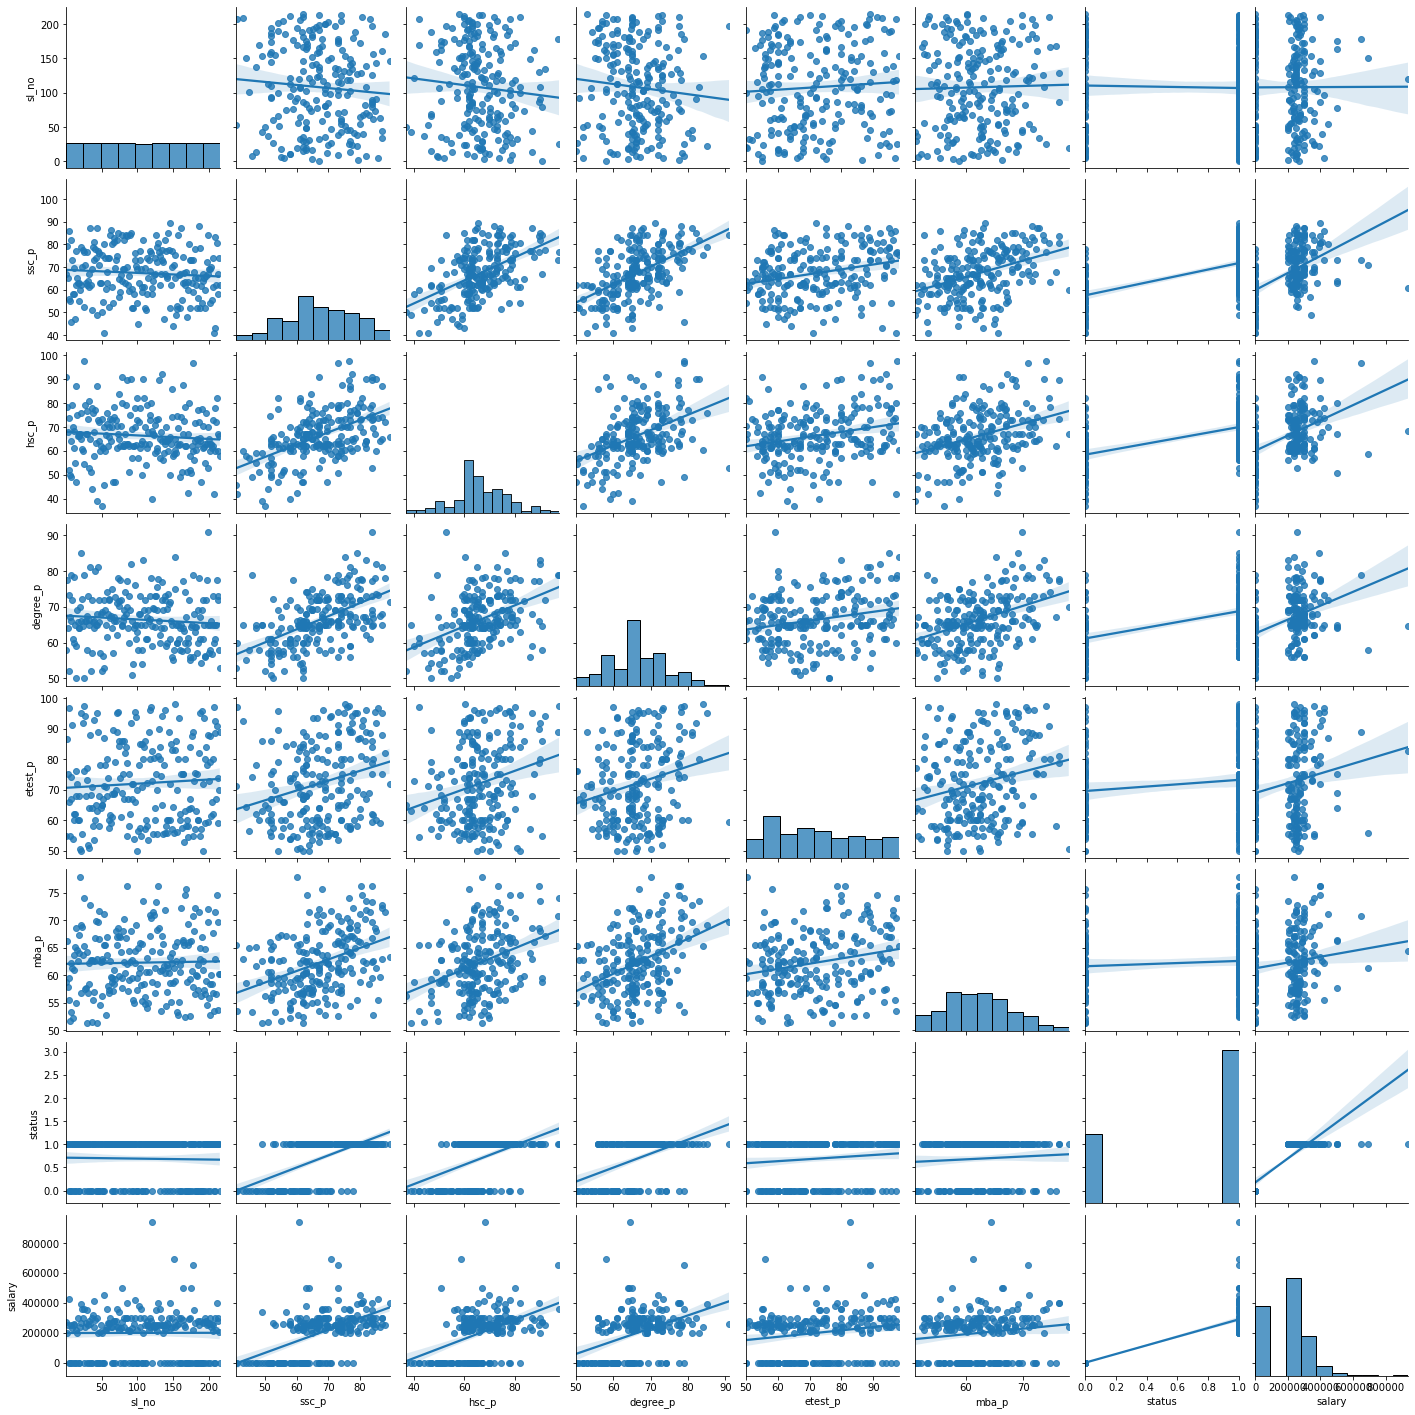

In [13]:
sns.pairplot(data=dataset, kind='reg')

In [20]:
placed_std=dataset[dataset['status']==1][['gender', 'salary', 'workex']]

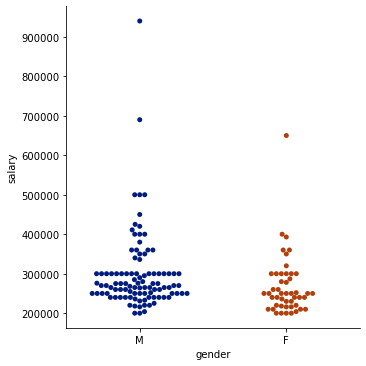

In [21]:
sns.catplot(y= 'salary', x='gender', kind='swarm', palette='dark', data=placed_std)

### Data Processing 

- need to do label encoding for categorical feature

In [25]:
categorical=[feature for feature in dataset.columns if dataset[feature].dtype == 'O']
print(categorical)

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']


In [28]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
for i in categorical:
    dataset[i]=label.fit_transform(dataset[i])

In [29]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


- see the above dataset that feature are converted and ready to insert

### Regression 

In [35]:
dataset_Rx=dataset.drop(['sl_no', 'salary'], 1)
dataset_Ry=dataset.salary


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataset_Rx, dataset_Ry, test_size=0.15)

In [45]:
X_train

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
75,0,59.00,0,62.00,1,1,77.50,0,0,74.00,1,67.00,0
64,1,80.00,1,73.00,1,1,75.00,0,0,61.00,0,58.78,1
85,0,83.84,1,89.83,1,1,77.20,0,1,78.74,0,76.18,1
131,0,74.90,1,57.00,1,2,62.00,1,1,80.00,0,60.78,1
52,0,40.89,1,45.83,1,1,53.00,0,0,71.20,1,65.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,58.00,1,60.00,1,2,72.00,2,0,74.00,0,53.62,1
95,1,73.00,0,78.00,1,1,65.00,0,1,95.46,0,62.16,1
209,1,62.00,0,72.00,0,1,65.00,0,0,67.00,0,56.49,1
208,0,43.00,0,60.00,1,2,65.00,0,0,92.66,1,62.92,0


In [46]:
from sklearn.preprocessing import StandardScaler
scaler_x=StandardScaler()
X_train=scaler_x.fit_transform(X_train)
X_test=scaler_x.fit_transform(X_test)

scaler_y=StandardScaler()
Y_train=scaler_y.fit_transform(np.array(Y_train).reshape(-1, 1))
Y_test=scaler_y.fit_transform(np.array(Y_test).reshape(-1, 1))

### 1. KNeighbores Regression

In [55]:
from sklearn.neighbors import KNeighborsRegressor

neighbor=KNeighborsRegressor(n_neighbors=3)
neighbor.fit(X_train, Y_train)
y_pred =neighbor.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_error of KNN model------>',
mean_squared_error(Y_test, y_pred))

print('r2_score of KNN model------>',
r2_score(Y_test, y_pred))

mean_squared_error of KNN model------> 0.35026880853294023
r2_score of KNN model------> 0.6497311914670598


### 2. Linear Regression 

In [56]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train, Y_train)
linear_pred=linear_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print('mean squ error of linear model ---> ',mean_squared_error(Y_test, linear_pred))
print('r2 score of linear model ---> ',r2_score(Y_test, linear_pred))

mean squ error of linear model --->  0.13548158491078627
r2 score of linear model --->  0.8645184150892138


###  3. Decision Tree Regression

In [59]:
from sklearn.tree import DecisionTreeRegressor
tree_model=DecisionTreeRegressor()
tree_model.fit(X_train, Y_train)
tree_pred=tree_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print('mean squ error of Decision Tree model ---> ',mean_squared_error(Y_test, tree_pred))
print('mean squ error of linear model ---> ',r2_score(Y_test, tree_pred))

mean squ error of Decision Tree model --->  0.3270617313413895
mean squ error of linear model --->  0.6729382686586105


###  Classification 

In [63]:
dataset_Cx=dataset.drop(['sl_no', 'salary'], 1)
dataset_Cy=dataset.salary

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(dataset_Cx, dataset_Cy, test_size=0.15)
X_train

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
154,1,53.00,0,63.00,1,2,60.00,0,1,70.00,0,53.20,1
146,1,62.00,0,63.00,1,2,66.00,0,0,85.00,1,55.14,1
7,1,82.00,0,64.00,0,2,66.00,2,1,67.00,0,62.14,1
135,0,72.00,0,56.00,1,2,69.00,0,0,55.60,1,65.63,1
71,1,75.00,1,70.29,1,1,71.00,0,0,95.00,0,66.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0,77.44,0,92.00,1,1,72.00,0,1,94.00,0,67.13,1
170,0,63.40,1,67.20,1,1,60.00,0,0,58.06,1,69.28,0
164,0,67.16,0,72.50,0,1,63.35,0,0,53.04,0,65.52,1
208,0,43.00,0,60.00,1,2,65.00,0,0,92.66,1,62.92,0


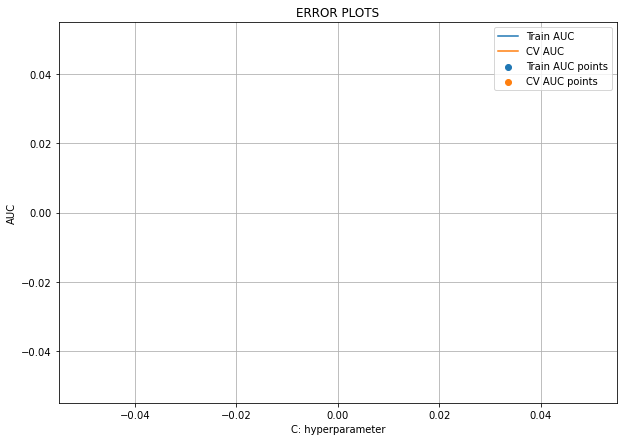

The best value of C is :  0.0001


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [10**x for x in range(-4,5)]}]
K =[10**x for x in range(-4,5)]
K = np.log10(K)
log= LogisticRegression(penalty='l2')

clf = GridSearchCV(log, parameters, cv=5, scoring='roc_auc',return_train_score=True)
clf.fit(X_train, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
lamb= clf.best_params_
lamb = list(lamb.values())[0]
plt.figure(figsize=(10, 7))

plt.plot(K, train_auc, label='Train AUC')
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(K, cv_auc, label='CV AUC')

plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')
plt.grid(True)
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()
print('The best value of C is : ' , lamb)